# Лабораторная работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 1384 Тапеха Владимир Алексеевич и Лукин Евгений Юрьевич. Вариант №9.

## Цель работы
Приобретение практических навыков фильтрации дискретных последовательностей с использованием полиномиальных фильтров и анализа полученных результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения



   **Дискретизация** — это процесс преобразования непрерывного сигнала в дискретный, который состоит из конечного числа отсчетов.


 **Дискретное преобразование Фурье (ДПФ)**:
   ДПФ используется для анализа частотного спектра дискретного сигнала. Оно преобразует временные отсчеты в частотные компоненты, позволяя увидеть, какие частоты присутствуют в сигнале.

   Формула для ДПФ выглядит следующим образом:

$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} kn}
$$

где:
- $ X[k] $ — значение ДПФ на $ k $-й частоте,
- $ x[n] $ — временной сигнал (дискретные отсчеты),
- $ N $ — общее количество отсчетов в сигнале,
- $ j$ — мнимая единица,
- $k$ — индекс частоты, который принимает значения от 0 до $ N-1$.


 **Линейное сглаживание**:
   Линейное сглаживание — это метод фильтрации, который уменьшает шум в сигнале, используя средние значения соседних отсчетов. Для сглаживания по 5 и 9 точкам используются следующие формулы:
   $$
   y[n] = \frac{1}{N} \sum_{k=0}^{N-1} x[n-k]
   $$
   где $ N $ — количество точек для сглаживания.

 **Передаточная функция фильтра**:
   Передаточная функция $ H(\omega) $ описывает, как фильтр изменяет амплитуду и фазу входного сигнала на различных частотах. Для линейного сглаживания можно использовать:
   $$
   H(\omega) = \frac{1}{N} \sum_{k=0}^{N-1} e^{-j\omega k}
   $$
   где $ j $ — мнимая единица.

## Постановка задачи
Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Импорт необходимых библиотек

In [419]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

### Задание 1
Сформировать дискретный сигнал посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos{(\omega_kt+φ_k)}$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\triangle \omega=0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $φ_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N=31$).

Дискретный сигнал $ x[n] $ был получен в результате дискретизации непрерывного сигнала $ f(t) $ с шагом $ T = 1 $, который представляет собой линейную комбинацию косинусоидальных функций:

$$
f(t) = \sum_{k=1}^{M} A_k \cos(2\pi f_k t + \phi_k)
$$

где $ A_k $ — амплитуды, $ f_k $ — частоты, $ \phi_k $ — фазы, а $ M $ — количество косинусоид.

Коэффициенты линейной комбинации были нормализованы следующим образом:

$$
A_k' = \frac{A_k}{\sum_{j=1}^{M} A_j}
$$

где $ A_k' $ — нормализованные амплитуды.

Дискретная последовательность $ x[n] $ состоит из 32 отсчетов, которые можно записать как:

$$
x[n] = f(nT) \quad \text{для } n = 0, 1, 2, \ldots, 31
$$

In [420]:
def generate_frequencies(num_harmonics):
    return np.arange(0, np.pi + 0.1 * np.pi, 0.1 * np.pi)

def generate_phases(num_harmonics):
    return np.random.uniform(0, 0.5, size=num_harmonics)

def generate_amplitudes(num_harmonics):
    return np.random.randint(1, 12, size=num_harmonics)

def create_analog_signal(num_samples):
    frequencies = generate_frequencies(11)
    phases = generate_phases(11)
    amplitudes = generate_amplitudes(11)

    time = np.linspace(0, 32, num_samples)
    signal = np.sum([A * np.cos(w * time + u) for w, u, A in zip(frequencies, phases, amplitudes)], axis=0)
    signal /= np.sum(amplitudes)

    return time, signal

def create_discrete_signal(analog_signal, analog_time):
    return analog_signal[::8], analog_time[::8]

In [421]:
num_samples = 256
analog_time, analog_signal = create_analog_signal(num_samples)
discrete_signal, discrete_time = create_discrete_signal(analog_signal, analog_time)


print("Аналоговый сигнал:")
print(analog_signal)

print("\nДискретный сигнал:")
print(discrete_signal)

Аналоговый сигнал:
[ 9.59095662e-01  8.87467330e-01  7.72532027e-01  6.23518799e-01
  4.52401157e-01  2.72674788e-01  9.80024144e-02 -5.91219282e-02
 -1.88542479e-01 -2.83321287e-01 -3.40240738e-01 -3.59888306e-01
 -3.46332280e-01 -3.06443943e-01 -2.48959926e-01 -1.83403980e-01
 -1.18997534e-01 -6.36826127e-02 -2.33604977e-02 -1.41806486e-03
  1.42442112e-03 -1.30498950e-02 -4.09905489e-02 -7.71173701e-02
 -1.15470079e-01 -1.50174295e-01 -1.76134335e-01 -1.89579375e-01
 -1.88413211e-01 -1.72345228e-01 -1.42807718e-01 -1.02688714e-01
 -5.59275815e-02 -7.03102932e-03  3.94304636e-02  7.92907284e-02
  1.09176154e-01  1.26784033e-01  1.31036463e-01  1.22109814e-01
  1.01351759e-01  7.11061424e-02  3.44704141e-02 -4.98877803e-03
 -4.35379617e-02 -7.75765496e-02 -1.03916873e-01 -1.20030657e-01
 -1.24250238e-01 -1.15914043e-01 -9.54465590e-02 -6.43639343e-02
 -2.51982768e-02  1.86626735e-02  6.32181574e-02  1.04169417e-01
  1.37288470e-01  1.58813136e-01  1.65833290e-01  1.56628736e-01
  1.30

### Задание 2
Визуализировать исходные аналоговый и дискретизированный сигналы.

In [422]:
def plot_signals(analog_time, analog_signal, discrete_time, discrete_signal):
    plt.figure(figsize=(10, 5))
    plt.plot(analog_time, analog_signal, label='Аналоговый сигнал', color='blue')
    plt.stem(discrete_time, discrete_signal, label='Дискретный сигнал', linefmt='r-', markerfmt='ro', basefmt='r-')
    plt.title('Аналоговый и дискретный сигналы')
    plt.xlabel('Время (t)')
    plt.ylabel('Амплитуда')
    plt.legend()
    plt.grid()
    plt.show()

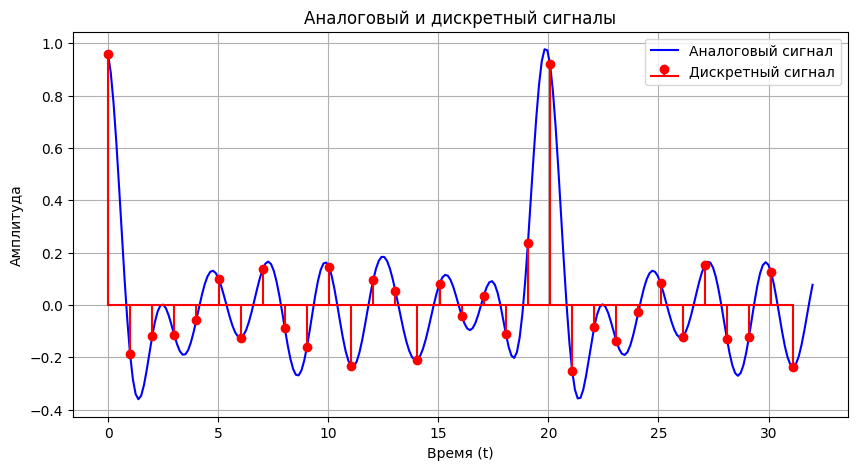

In [423]:
plot_signals(analog_time, analog_signal, discrete_time, discrete_signal)

### Задание 3
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

Рассмотрим дискретный сигнал, представленный в виде функции от времени:

$$
s(t) = \sum_{k=-\infty}^\infty x_k \delta(t - k)
$$

Согласно свойствам преобразования Фурье, спектр дискретного сигнала можно выразить как периодическую функцию с периодом $2\pi$:

$$
S(\omega) = \sum_{k=-\infty}^\infty x_k e^{-i\omega k}
$$

С другой стороны, дискретный сигнал можно записать в следующем виде:

$$
s_d(t) = \sum_{k=-\infty}^\infty s(t) \delta(t - kT)
$$

Вынесем $s(t)$ за знак суммы:

$$
s_d(t) = s(t) \sum_{k=-\infty}^\infty \delta(t - kT)
$$

Сумма может быть представлена в виде комплексного ряда Фурье:

$$
\sum_{k=-\infty}^\infty \delta(t - kT) = \sum_{k=-\infty}^\infty c_k e^{i\omega_k t}
$$

где

$
\omega_k = \frac{2\pi k}{T}, \quad c_k = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} \delta(t) e^{-i\omega_k t} dt = \frac{1}{T}
$

Таким образом, дискретный сигнал можно записать в следующем виде:

$$
s_d(t) = \frac{1}{T} \sum_{k=-\infty}^\infty s(t) e^{i\omega_k t}
$$

А его спектр будет иметь вид:

$$
S_d(\omega) = \frac{1}{T} \sum_{k=-\infty}^\infty S\left(\omega - \frac{2\pi k}{T}\right)
$$

Напишем функции расчета и визуализации

In [424]:
def compute_spectrum(discrete_signal):
    yf = np.fft.fft(discrete_signal)
    xf = np.fft.fftfreq(len(discrete_signal), 1)
    return xf, np.abs(yf)

def plot_spectrum(xf, yf):
    plt.figure(figsize=(10, 5))
    plt.stem(xf, yf, label='Спектр')
    plt.ylabel('Спектр')
    plt.xlabel('Частота')
    plt.title('Дискретное преобразование Фурье')
    plt.grid()
    plt.legend()
    plt.show()

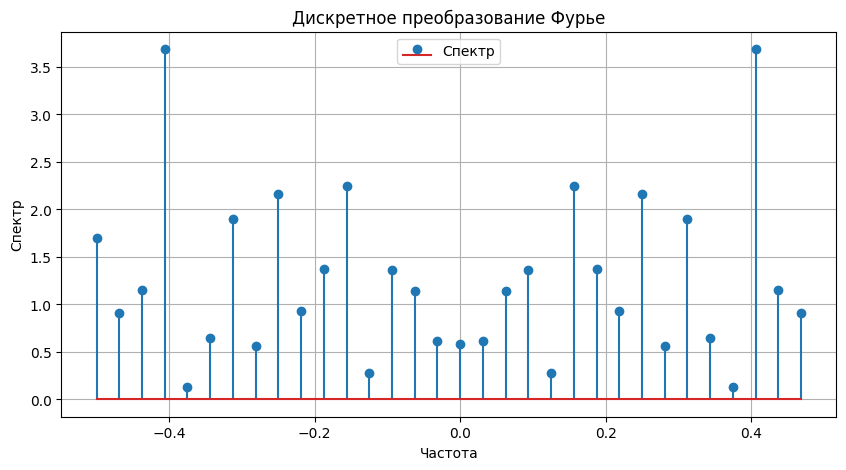

In [425]:
xf, yf = compute_spectrum(discrete_signal)

plot_spectrum(xf, yf)

Спектр сигнала $ S(f) $ обладает симметрией относительно нулевой частоты, что можно выразить математически как $ S(f) = S(-f) $. Это свойство возникает из того, что сигнал может быть представлен в виде суммы синусоидальных компонентов, что формально записывается как:

$$
x(t) = \sum_{n=-\infty}^{\infty} A_n \cdot e^{j 2 \pi f_n t}
$$

где $ A_n $ — амплитуда каждой синусоидальной компоненты, а $ f_n $ — соответствующая частота.

Симметрия спектра подразумевает, что каждая частота $ f_n $ в сигнале имеет свою амплитуду $ A_n $, и спектр повторяется с равными интервалами, что делает его периодическим с периодом $ T = 1 $. Таким образом, для любого $ f $ выполняется условие:

$$
S(f + k) = S(f)
$$

### Задание 4
Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega) $– передаточной функции (частотной характеристики) фильтра.

Линейное сглаживание дискретного сигнала по 5 и 9 точкам выполняется с использованием полинома первой степени, при этом коэффициенты в передаточной функции остаются одинаковыми. В z-области это можно записать следующим образом:

$$
H_5(z) = 0.2(z^{-2} + z^{-1} + 1 + z^1 + z^2)
$$

$$
H_9(z) = \frac{1}{9}(z^{-4} + z^{-3} + z^{-2} + z^{-1} + 1 + z^1 + z^2 + z^3 + z^4)
$$

Формула для передаточной функции (частотной характеристики) фильтра имеет вид:

$$
H(\omega) = \sin\left((N + \frac{1}{2})\omega\right)
$$

### Задание 5
Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

Напишем сглаживание

In [426]:
def smooth_signal(signal, window_size):
    return np.convolve(signal, np.ones(window_size), 'same') / window_size

lin_avg_5 = smooth_signal(discrete_signal, 5)
lin_avg_9 = smooth_signal(discrete_signal, 9)

Визуализация сглаженных графиков

In [427]:
def plot_smooth_signals(discrete_time, discrete_signal, smoothed_signal, window_size):
    plt.figure(figsize=(10, 5))
    plt.stem(discrete_time, discrete_signal, label='Исходный сигнал')
    plt.stem(discrete_time, smoothed_signal, 'r', label=f'Сглаженный график')
    plt.ylabel(r'$x$(t)')
    plt.xlabel('t')
    plt.legend()
    plt.title(f'Линейное сглаживание по {window_size} точкам')
    plt.grid()
    plt.show()


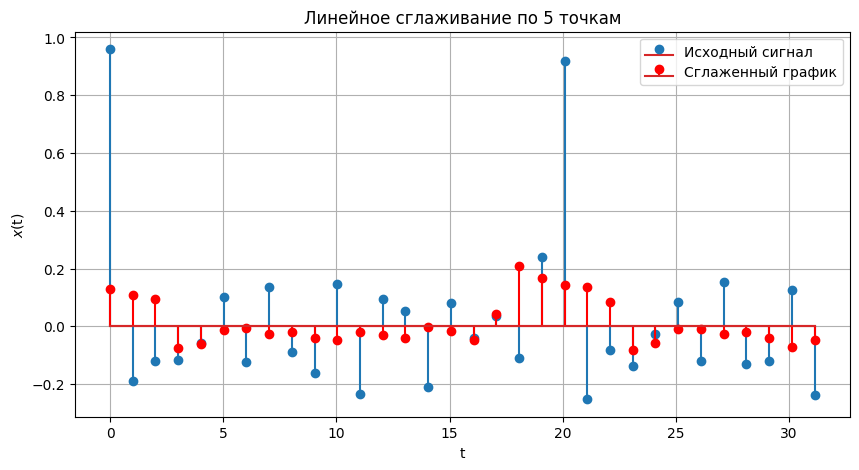

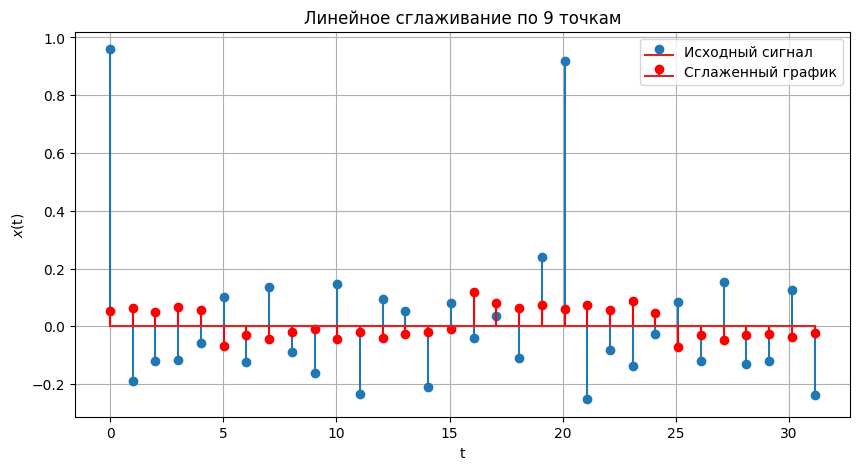

In [428]:
plot_smooth_signals(discrete_time, discrete_signal, lin_avg_5, 5)
plot_smooth_signals(discrete_time, discrete_signal, lin_avg_9, 9)

### Задание 6
С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

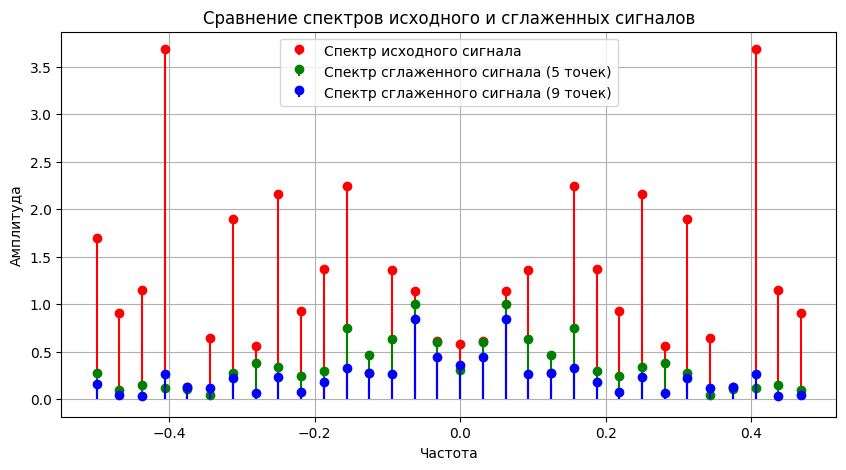

In [429]:
def plot_spectrums(xf_original, yf_original, xf_smoothed_5, yf_smoothed_5, xf_smoothed_9, yf_smoothed_9):
    """Функция для визуализации спектров исходного и сглаженных сигналов на одном графике."""
    plt.figure(figsize=(10, 5))
    plt.stem(xf_original, yf_original, label='Спектр исходного сигнала', linefmt='red', markerfmt='ro', basefmt=' ')
    plt.stem(xf_smoothed_5, yf_smoothed_5, label='Спектр сглаженного сигнала (5 точек)', linefmt='green', markerfmt='go', basefmt=' ')
    plt.stem(xf_smoothed_9, yf_smoothed_9, label='Спектр сглаженного сигнала (9 точек)', linefmt='blue', markerfmt='bo', basefmt=' ')
    plt.title('Сравнение спектров исходного и сглаженных сигналов')
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда')
    plt.grid()
    plt.legend()
    plt.show()

xf_original, yf_original = compute_spectrum(discrete_signal)
xf_smoothed_5, yf_smoothed_5 = compute_spectrum(lin_avg_5)
xf_smoothed_9, yf_smoothed_9 = compute_spectrum(lin_avg_9)

plot_spectrums(xf_original, yf_original, xf_smoothed_5, yf_smoothed_5, xf_smoothed_9, yf_smoothed_9)

### Задание 7
Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

В процессе фильтрации амплитуды сигналов уменьшаются, что становится особенно заметным при увеличении расстояния от нуля. С увеличением числа точек для сглаживания спектр становится более гладким, что приводит к более выраженному подавлению высокочастотных компонентов. Это можно объяснить тем, что при использовании большего количества точек фильтр усредняет значения на более широком интервале, что снижает влияние резких изменений в сигнале и, следовательно, уменьшает амплитуды высоких частот.

Таким образом, увеличение числа точек в фильтре приводит к более выраженному эффекту подавления высоких частот, что можно выразить через передаточную функцию фильтра $ H(\omega) $, которая показывает, как различные частоты сигнала влияют на выходной сигнал.

### Задание 8

Повторить п. 4–7 для следующих фильтров:
1. Сглаживание полиномом 2-ой степени по 5 и 9 узлам
2. Сглаживание полиномом 4-ой степени по 7 и 11 узлам




Функция для визуализации исходного и сглаженного сигналов

In [430]:
def plot_smoothing(x, original_signal, smoothed_signal, title):
    plt.stem(x, original_signal, 'r', markerfmt='r', label='Исходный сигнал')
    plt.stem(x, smoothed_signal, 'b', markerfmt='b', label='Сглаженный сигнал')
    plt.legend()
    plt.title(title)
    plt.grid()
    plt.show()

1. Для сглаживания полиномом второй степени мы используем передаточные функции, которые описывают, как частоты в сигнале преобразуются в амплитуды после применения фильтра.

Расчет сглаженного сигнала полинома 2-ой степени по 5 и 9 узлам

In [431]:
signal5_smooth = savgol_filter(discrete_signal, 5, 2)
signal9_smooth = savgol_filter(discrete_signal, 9, 2)

Сглаживание полиномом 2-й степени, 5 точек


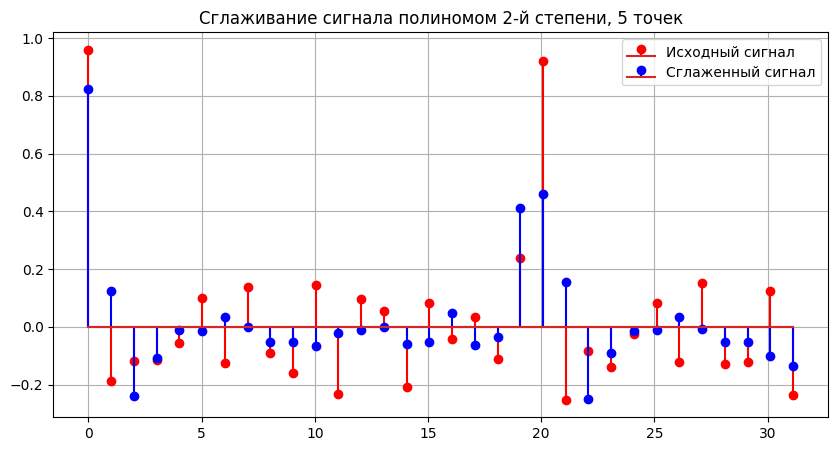

In [432]:
plt.figure(figsize=(10, 5))

plot_smoothing(discrete_time, discrete_signal, signal5_smooth, 'Сглаживание сигнала полиномом 2-й степени, 5 точек')

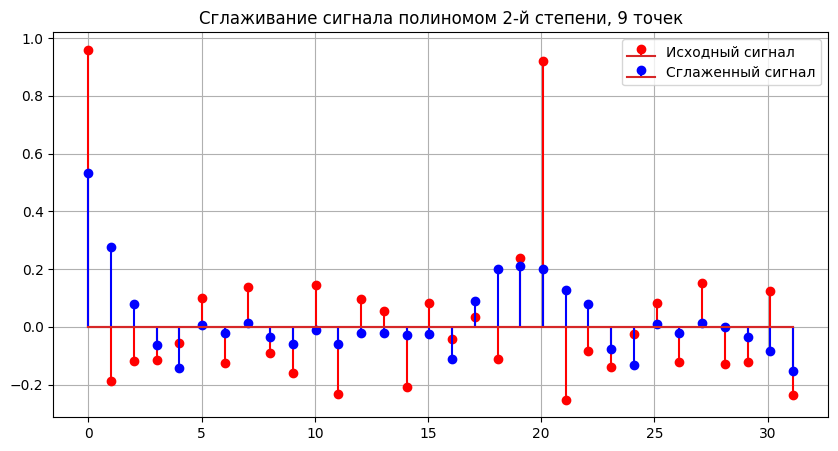

In [433]:
plt.figure(figsize=(10, 5))

plot_smoothing(discrete_time, discrete_signal, signal9_smooth, 'Сглаживание сигнала полиномом 2-й степени, 9 точек')

Вычисление спектра для исходного и сглаженных сигналов

In [434]:
def compute_spectrum(signal):
    spectrum = np.fft.fft(signal)
    return 2 * np.abs(spectrum) / len(spectrum)

f_original = compute_spectrum(discrete_signal)
f_5 = compute_spectrum(signal5_smooth)
f_9 = compute_spectrum(signal9_smooth)

Ось частот

In [435]:
N = len(discrete_signal)
xf = np.fft.fftfreq(N, d=1)

Визуализация оригинального сигнала и сглаженных сигналов

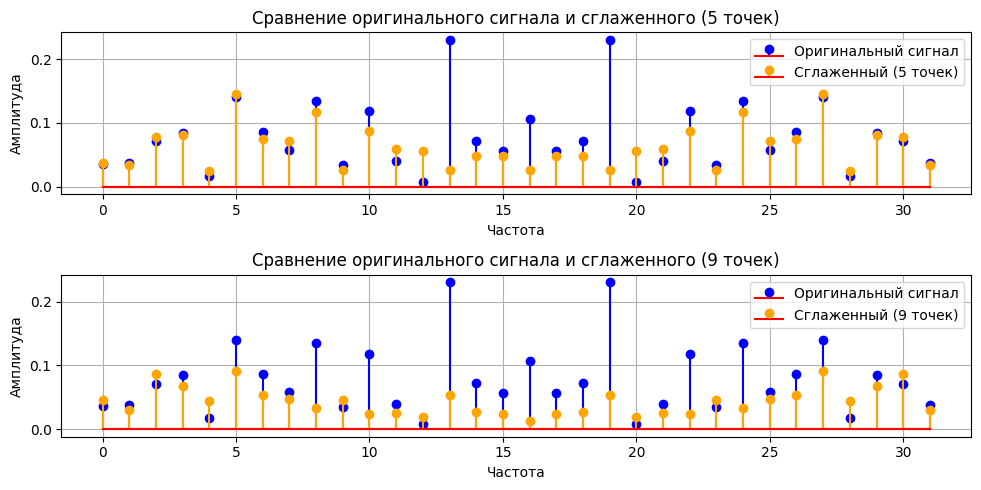

In [436]:
def plot_spectrum_comparison(f_original, f_smooth, smooth_label, title):
    plt.stem(f_original, linefmt='b-', markerfmt='bo', basefmt='r-', label='Оригинальный сигнал')
    plt.stem(f_smooth, linefmt='orange', markerfmt='o', basefmt='r-', label=f'Сглаженный ({smooth_label})')
    plt.ylabel('Амплитуда')
    plt.xlabel('Частота')
    plt.title(title)
    plt.legend()
    plt.grid()

plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plot_spectrum_comparison(f_original, f_5, '5 точек', 'Сравнение оригинального сигнала и сглаженного (5 точек)')

plt.subplot(2, 1, 2)
plot_spectrum_comparison(f_original, f_9, '9 точек', 'Сравнение оригинального сигнала и сглаженного (9 точек)')

plt.tight_layout()
plt.show()

2. Аналогично, для сглаживания полиномом четвертой степени мы также используем передаточные функции.

In [437]:
h7_smooth = savgol_filter(discrete_signal, 7, 4)
h11_smooth = savgol_filter(discrete_signal, 11, 4)

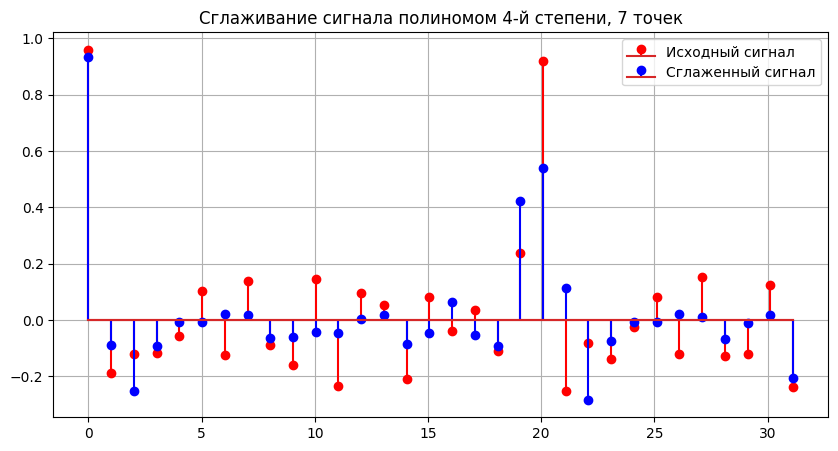

In [438]:
plt.figure(figsize=(10, 5))

plot_smoothing(discrete_time, discrete_signal, h7_smooth, 'Сглаживание сигнала полиномом 4-й степени, 7 точек')

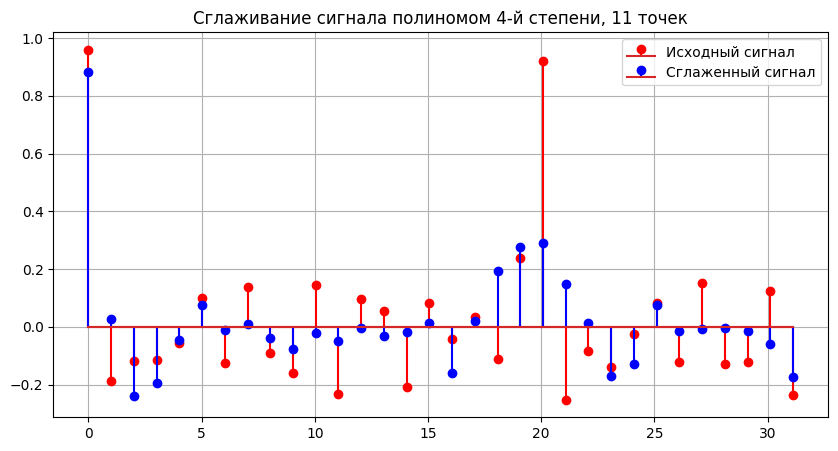

In [439]:
plt.figure(figsize=(10, 5))

plot_smoothing(discrete_time, discrete_signal, h11_smooth, 'Сглаживание сигнала полиномом 4-й степени, 11 точек')

Вычисление спектров

In [440]:
f_original = compute_spectrum(discrete_signal)
f_7 = compute_spectrum(h7_smooth)
f_11 = compute_spectrum(h11_smooth)

Ось частот

In [441]:
N = len(discrete_signal)
xf = np.fft.fftfreq(N, d=1)

Визуализация спектров

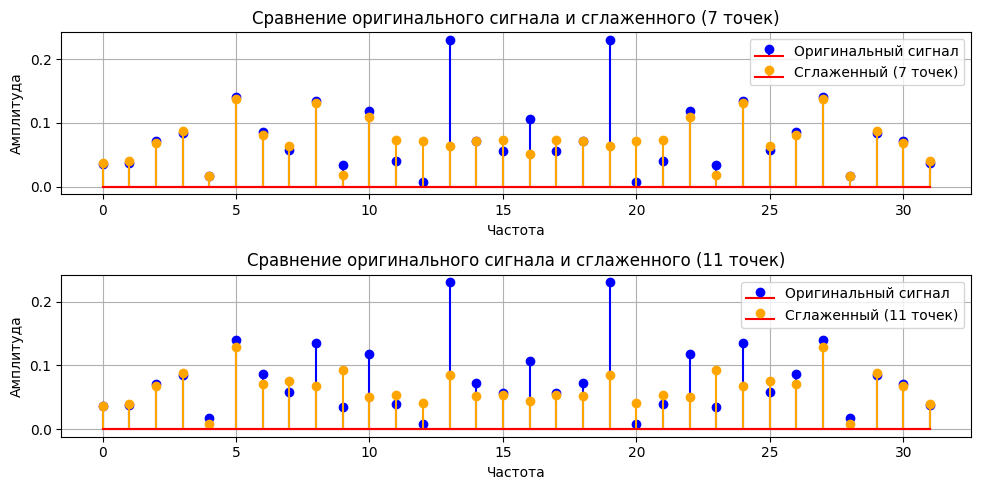

In [442]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plot_spectrum_comparison(f_original, f_7, '7 точек', 'Сравнение оригинального сигнала и сглаженного (7 точек)')

plt.subplot(2, 1, 2)
plot_spectrum_comparison(f_original, f_11, '11 точек', 'Сравнение оригинального сигнала и сглаженного (11 точек)')

plt.tight_layout()
plt.show()

### Задание 9.

Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.

1. Дискретизация непрерывного сигнала с шагом T = 1 привела к формированию дискретного сигнала из 32 отсчетов. При этом наблюдается потеря некоторых деталей, особенно в высокочастотных компонентах. Тем не менее, дискретный сигнал сохраняет основные характеристики и может быть использован для анализа.

2. По графикам видно, что дискретизация искажает сигнал, но основные формы остаются видимыми. Спектральный анализ с помощью ДПФ подтвердил наличие пиков, соответствующих частотам гармоник. После фильтрации наблюдается значительное снижение амплитуды высокочастотных компонентов, что говорит о эффективности фильтрации в уменьшении шума.

3. Линейное сглаживание, хотя и простое, может не всегда обеспечивать достаточное сглаживание, в то время как полиномиальное сглаживание лучше сохраняет форму сигнала, но требует более сложных вычислений.

### Выводы

В ходе работы была проведена обработка дискретного сигнала, полученного из линейной комбинации косинусоид. Дискретизация сигнала с шагом $ T = 1 $ позволила получить 32 отсчета, что обеспечило представление сигнала в дискретной форме. Применение дискретного преобразования Фурье (ДПФ) дало возможность проанализировать его частотный спектр, выявив основные частоты и их амплитуды.

Методы фильтрации, включая линейное сглаживание по 5 и 9 точкам, а также сглаживание полиномами 2-ой и 4-ой степени, значительно улучшили качество сигнала, уменьшая шум и искажения. Визуализация исходного и отфильтрованного сигналов показала, что фильтрация эффективно восстанавливает форму сигнала.